In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

In [58]:
enrollment = pd.read_excel('data/TennCare_Enrollment_Data.xlsx')
poverty = pd.read_excel('data/Tennessee_Poverty_Data.xlsx')
unemployment = pd.read_excel('data/Tennessee_Annual_Unemployment_Data.xlsx')
birth = pd.read_excel('data/Tennessee_Birth_Data.xlsx')
population = pd.read_excel('data/Population_Rates.xlsx')
unemployment1 = pd.read_excel('data/Tennessee_Unemployment_Data.xlsx')

In [3]:
population.dtypes

County    object
2010       int64
2011       int64
2012       int64
2013       int64
2014       int64
2015       int64
2016       int64
2017       int64
2018       int64
dtype: object

In [4]:
enrollment.head()

,County,Date,Year,Month,Female 0 - 18,Female 19 - 20,Female 21 - 64,Female 65 -->,Female_Total,Male 0 - 18,Male 19 - 20,Male 21 - 64,Male 65 -->,Male_Total,Unknown 0 - 18,Unknown 19 - 20,Unknown 21 - 64,Unknown 65 -->,Unknown Total,Grand_Total
0,Anderson,2018-01-01,2018,January,4165,330,4389,610,9494,4385,267,2059,272,6983,0,4165,0,0,0,16477
1,Bedford,2018-01-01,2018,January,3903,240,3071,246,7460,3983,208,1228,104,5523,0,3903,0,0,0,12983
2,Benton,2018-01-01,2018,January,1019,94,1187,141,2441,1072,71,547,75,1765,0,1019,0,0,0,4206
3,Bledsoe,2018-01-01,2018,January,720,71,766,119,1676,855,51,442,66,1414,0,720,0,0,0,3090
4,Blount,2018-01-01,2018,January,6030,507,6029,673,13239,6248,345,2676,314,9583,0,6030,0,0,0,22822


In [5]:
enrollment = enrollment.rename(columns = {'Grand_Total':'Enrollee_Total'})
enrollment.head()

,County,Date,Year,Month,Female 0 - 18,Female 19 - 20,Female 21 - 64,Female 65 -->,Female_Total,Male 0 - 18,Male 19 - 20,Male 21 - 64,Male 65 -->,Male_Total,Unknown 0 - 18,Unknown 19 - 20,Unknown 21 - 64,Unknown 65 -->,Unknown Total,Enrollee_Total
0,Anderson,2018-01-01,2018,January,4165,330,4389,610,9494,4385,267,2059,272,6983,0,4165,0,0,0,16477
1,Bedford,2018-01-01,2018,January,3903,240,3071,246,7460,3983,208,1228,104,5523,0,3903,0,0,0,12983
2,Benton,2018-01-01,2018,January,1019,94,1187,141,2441,1072,71,547,75,1765,0,1019,0,0,0,4206
3,Bledsoe,2018-01-01,2018,January,720,71,766,119,1676,855,51,442,66,1414,0,720,0,0,0,3090
4,Blount,2018-01-01,2018,January,6030,507,6029,673,13239,6248,345,2676,314,9583,0,6030,0,0,0,22822


In [6]:
county_avg = round(enrollment.groupby(['Year', 'County'])['Enrollee_Total'].mean().reset_index())
county_avg.head()

,Year,County,Enrollee_Total
0,2010,Anderson,14187.0
1,2010,Bedford,10565.0
2,2010,Benton,3496.0
3,2010,Bledsoe,2947.0
4,2010,Blount,18327.0


In [7]:
county_avg.to_excel('data/county_avg.xlsx', sheet_name ='county_avg')

In [8]:
county_avg_year = county_avg.groupby('Year').sum().reset_index()
county_avg_year.head(10)

,Year,Enrollee_Total
0,2010,1222705.0
1,2011,1232173.0
2,2012,1216996.0
3,2013,1195007.0
4,2014,1282992.0
5,2015,1437228.0
6,2016,1541891.0
7,2017,1457539.0
8,2018,1393489.0


In [9]:
county_avg_year.to_excel('data/county_avg_year.xlsx', sheet_name ='county_avg_year')

In [10]:
enrollment_year_pct_change = county_avg_year
enrollment_year_pct_change['Enrollment_Pct_Change'] = enrollment_year_pct_change.Enrollee_Total.pct_change()*100
enrollment_year_pct_change.head(10)

,Year,Enrollee_Total,Enrollment_Pct_Change
0,2010,1222705.0,NaN
1,2011,1232173.0,0.774349
2,2012,1216996.0,-1.231726
3,2013,1195007.0,-1.806826
4,2014,1282992.0,7.362718
5,2015,1437228.0,12.021587
6,2016,1541891.0,7.282282
7,2017,1457539.0,-5.470685
8,2018,1393489.0,-4.394394


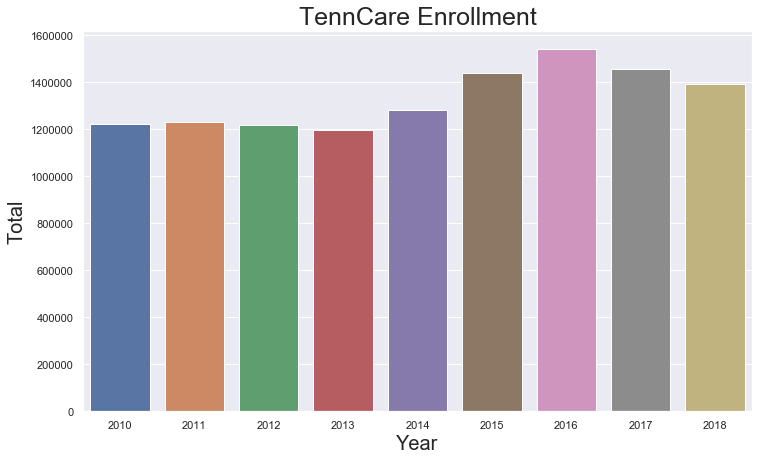

In [11]:
plt.figure(figsize=(12, 7))
sns.set(style='darkgrid')
ax = sns.barplot(x='Year', y='Enrollee_Total', data=county_avg_year)
ax.set_title('TennCare Enrollment',fontsize=25)
ax.set_xlabel('Year',fontsize=20);
ax.set_ylabel('Total',fontsize=20);



## Poverty % Change

In [12]:
poverty.head()

,County,Year,Poverty_Estimate_All_Ages
0,Anderson,2010,11965
1,Bedford,2010,10453
2,Benton,2010,3242
3,Bledsoe,2010,2631
4,Blount,2010,16861


In [13]:
poverty_year = poverty.groupby('Year').sum()
poverty_year = poverty_year.reset_index()
poverty_year.head(10)

,Year,Poverty_Estimate_All_Ages
0,2010,1102644
1,2011,1148160
2,2012,1135203
3,2013,1128617
4,2014,1165248
5,2015,1077867
6,2016,1023825
7,2017,980394
8,2018,1003053


In [14]:
poverty_pct_change = poverty_year
poverty_pct_change['Poverty_Pct_Change'] = poverty_pct_change.Poverty_Estimate_All_Ages.pct_change()*100
poverty_pct_change.head(15)

,Year,Poverty_Estimate_All_Ages,Poverty_Pct_Change
0,2010,1102644,NaN
1,2011,1148160,4.127896
2,2012,1135203,-1.128501
3,2013,1128617,-0.580161
4,2014,1165248,3.245654
5,2015,1077867,-7.498919
6,2016,1023825,-5.013791
7,2017,980394,-4.242034
8,2018,1003053,2.311214


## Unemployment % Change

In [15]:
unemployment.head()

,Year,Unemployment_Rate
0,2010,9.633333
1,2011,8.966667
2,2012,7.825000
3,2013,7.733333
4,2014,6.600000


In [16]:
unemployment_pct_change = unemployment
unemployment_pct_change.head(15)

,Year,Unemployment_Rate
0,2010,9.633333
1,2011,8.966667
2,2012,7.825000
3,2013,7.733333
4,2014,6.600000
5,2015,5.600000
6,2016,4.733333
7,2017,3.750000
8,2018,3.491667


In [17]:
unemployment_pct_change['Unemployment_Pct_Change'] = unemployment_pct_change.Unemployment_Rate.pct_change()*100
unemployment_pct_change.head(15)

,Year,Unemployment_Rate,Unemployment_Pct_Change
0,2010,9.633333,NaN
1,2011,8.966667,-6.920415
2,2012,7.825000,-12.732342
3,2013,7.733333,-1.171459
4,2014,6.600000,-14.655172
5,2015,5.600000,-15.151515
6,2016,4.733333,-15.476190
7,2017,3.750000,-20.774648
8,2018,3.491667,-6.888889


## Birth % Change

In [18]:
birth.head()

,County,Year,Total_Number,Total_Rate,White_Number,White_Rate,Black_Number,Black_Rate
0,Anderson,2010,832,11.1,785,11.4,32,11.2
1,Bedford,2010,642,14.2,594,16.1,38,10.7
2,Benton,2010,155,9.4,148,9.4,3,9.3
3,Bledsoe,2010,132,10.3,129,10.7,2,4.3
4,Blount,2010,1189,9.7,1139,9.9,34,10.1


In [19]:
birth = birth[['Year', 'Total_Number']]
birth = birth.rename(columns={'Total_Number':'Birth_Total'})

In [20]:
birth_year = birth.groupby('Year').sum()
birth_year = birth_year.reset_index()
birth_year.head(12)

,Year,Birth_Total
0,2010,79345
1,2011,79462
2,2012,80202
3,2013,79954
4,2014,81609
5,2015,81374
6,2016,80753
7,2017,81022
8,2018,80735


In [21]:
birth_pct_change = birth_year
birth_pct_change['Birth_Pct_Change'] = birth_pct_change.Birth_Total.pct_change()*100
birth_pct_change.head(15)

,Year,Birth_Total,Birth_Pct_Change
0,2010,79345,NaN
1,2011,79462,0.147457
2,2012,80202,0.931263
3,2013,79954,-0.309219
4,2014,81609,2.069940
5,2015,81374,-0.287958
6,2016,80753,-0.763143
7,2017,81022,0.333115
8,2018,80735,-0.354225


## Population % Change

In [22]:
population.head()

,County,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Anderson,75105,75170,75191,75268,75139,75485,75583,76187,76482
1,Bedford,45077,45240,45271,45613,46288,46922,47402,48138,49038
2,Benton,16511,16488,16414,16360,16173,16184,16058,15959,16184
3,Bledsoe,12884,12909,12853,13848,14419,14489,14615,14730,14755
4,Blount,123199,123659,123905,124865,125839,126869,128259,129900,131349


In [23]:
population_year = population.melt(id_vars=['County'], var_name = 'Year', value_name='Population_Total')
population_year = population_year.groupby('Year').sum()
population_year = population_year.reset_index()
population_year.head(15)

,Year,Population_Total
0,2010,6355301
1,2011,6397410
2,2012,6451281
3,2013,6493432
4,2014,6540826
5,2015,6590808
6,2016,6645011
7,2017,6708794
8,2018,6770010


In [24]:
population_pct_change = population_year
population_pct_change['Population_Pct_Change'] = population_year.Population_Total.pct_change()*100
population_pct_change.head(15)

,Year,Population_Total,Population_Pct_Change
0,2010,6355301,NaN
1,2011,6397410,0.662581
2,2012,6451281,0.842075
3,2013,6493432,0.653374
4,2014,6540826,0.729876
5,2015,6590808,0.764154
6,2016,6645011,0.822403
7,2017,6708794,0.959863
8,2018,6770010,0.912474


## All % Change

In [25]:
pct_change_all = enrollment_year_pct_change.merge(poverty_pct_change, on='Year').merge(unemployment_pct_change, on='Year').merge(birth_pct_change, on='Year').merge(population_pct_change, on='Year')
pct_change_all = pct_change_all[['Year','Enrollee_Total', 'Enrollment_Pct_Change', 'Poverty_Pct_Change', 'Unemployment_Pct_Change', 'Birth_Pct_Change', 'Population_Pct_Change']]
pct_change_all.head(15)

,Year,Enrollee_Total,Enrollment_Pct_Change,Poverty_Pct_Change,Unemployment_Pct_Change,Birth_Pct_Change,Population_Pct_Change
0,2010,1222705.0,NaN,NaN,NaN,NaN,NaN
1,2011,1232173.0,0.774349,4.127896,-6.920415,0.147457,0.662581
2,2012,1216996.0,-1.231726,-1.128501,-12.732342,0.931263,0.842075
3,2013,1195007.0,-1.806826,-0.580161,-1.171459,-0.309219,0.653374
4,2014,1282992.0,7.362718,3.245654,-14.655172,2.069940,0.729876
5,2015,1437228.0,12.021587,-7.498919,-15.151515,-0.287958,0.764154
6,2016,1541891.0,7.282282,-5.013791,-15.476190,-0.763143,0.822403
7,2017,1457539.0,-5.470685,-4.242034,-20.774648,0.333115,0.959863
8,2018,1393489.0,-4.394394,2.311214,-6.888889,-0.354225,0.912474


##  Getting poverty rate by county

In [26]:
population.head()

,County,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Anderson,75105,75170,75191,75268,75139,75485,75583,76187,76482
1,Bedford,45077,45240,45271,45613,46288,46922,47402,48138,49038
2,Benton,16511,16488,16414,16360,16173,16184,16058,15959,16184
3,Bledsoe,12884,12909,12853,13848,14419,14489,14615,14730,14755
4,Blount,123199,123659,123905,124865,125839,126869,128259,129900,131349


In [27]:
population_county_2018 = population[['County', 2018]]
population_county_2018 = population_county_2018.rename(columns = {2018:'Population_2018'})
population_county_2018.head()

,County,Population_2018
0,Anderson,76482
1,Bedford,49038
2,Benton,16184
3,Bledsoe,14755
4,Blount,131349


In [28]:
poverty_2018 = poverty[poverty.Year == 2018]
poverty_2018.head()

,County,Year,Poverty_Estimate_All_Ages
760,Anderson,2018,12433
761,Bedford,2018,6955
762,Benton,2018,3068
763,Bledsoe,2018,3235
764,Blount,2018,12816


In [29]:
population_poverty_2018 = population_county_2018.merge(poverty_2018, on='County')
population_poverty_2018['Poverty_Rate'] = population_poverty_2018['Poverty_Estimate_All_Ages'] / population_poverty_2018['Population_2018']*100
population_poverty_2018 = population_poverty_2018.sort_values(by=['Poverty_Rate'], ascending=False)
population_poverty_2018.head(10)

,County,Population_2018,Year,Poverty_Estimate_All_Ages,Poverty_Rate
32,Hancock,6549,2018,1912,29.195297
46,Lake,7411,2018,1795,24.220753
47,Lauderdale,25825,2018,5907,22.873185
12,Claiborne,31756,2018,7129,22.449301
14,Cocke,35774,2018,7981,22.309499
84,Warren,40878,2018,9025,22.077890
3,Bledsoe,14755,2018,3235,21.924771
75,Shelby,935764,2018,198554,21.218384
6,Campbell,39583,2018,8392,21.201021
29,Grundy,13346,2018,2787,20.882661


## Getting unemployment rate by county

In [60]:
unemployment1.head()

,County,Year,Unemployment_Rate
0,Bledsoe,2018,5.8
1,Lauderdale,2018,5.8
2,Rhea,2018,5.6
3,Houston,2018,5.5
4,Haywood,2018,5.4


In [66]:
unemployment_2018 = unemployment1[unemployment1.Year == 2018]
unemployment_2018 = unemployment_2018.sort_values(by=['Unemployment_Rate'], ascending=False)
unemployment_2018.head(10)

,County,Year,Unemployment_Rate
0,Bledsoe,2018,5.8
1,Lauderdale,2018,5.8
2,Rhea,2018,5.6
3,Houston,2018,5.5
4,Haywood,2018,5.4
5,McNairy,2018,5.4
6,Lake,2018,5.2
7,Hancock,2018,5.1
8,Clay,2018,5.0
9,Hardeman,2018,5.0


## Getting enrollment rate by county

In [30]:
enrollment_2018 = county_avg[['County', 'Year', 'Enrollee_Total']]
enrollment_2018 = enrollment_2018[enrollment_2018.Year == 2018]
enrollment_2018 = enrollment_2018.groupby(['County', 'Year']).sum().reset_index()
enrollment_2018.head()

,County,Year,Enrollee_Total
0,Anderson,2018,15789.0
1,Bedford,2018,12296.0
2,Benton,2018,4001.0
3,Bledsoe,2018,2950.0
4,Blount,2018,21356.0


In [31]:
population_enrollee_2018 = population_county_2018.merge(enrollment_2018, on='County')
population_enrollee_2018['Enrollee_Rate'] = population_enrollee_2018['Enrollee_Total'] / population_enrollee_2018['Population_2018']*100
population_enrollee_2018 = population_enrollee_2018.sort_values(by=['Enrollee_Rate'], ascending=False)
population_enrollee_2018.head(10)

,County,Population_2018,Year,Enrollee_Total,Enrollee_Rate
33,Hancock,6549,2018,2277.0,34.768667
75,Scott,22039,2018,7430.0,33.712963
30,Grundy,13346,2018,4390.0,32.893751
24,Fentress,18217,2018,5775.0,31.701158
14,Cocke,35774,2018,11107.0,31.047688
6,Campbell,39583,2018,12258.0,30.967840
37,Haywood,17335,2018,5281.0,30.464378
48,Lauderdale,25825,2018,7380.0,28.576960
47,Lake,7411,2018,2060.0,27.796519
12,Claiborne,31756,2018,8762.0,27.591636


## Getting total youth enrollment numbers, ages 0-18

In [32]:
enrollment_youth = enrollment[['Year', 'County', 'Female 0 - 18', 'Male 0 - 18']]
enrollment_youth['Youth_Total'] = enrollment_youth['Female 0 - 18'] + enrollment_youth['Male 0 - 18']
enrollment_youth.head()

C:\Users\Bryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,County,Female 0 - 18,Male 0 - 18,Youth_Total
0,2018,Anderson,4165,4385,8550
1,2018,Bedford,3903,3983,7886
2,2018,Benton,1019,1072,2091
3,2018,Bledsoe,720,855,1575
4,2018,Blount,6030,6248,12278


In [33]:
enrollment_youth_avg = round(enrollment_youth.groupby(['Year', 'County'])['Youth_Total'].mean().reset_index())
enrollment_youth_avg.head()

,Year,County,Youth_Total
0,2010,Anderson,7718.0
1,2010,Bedford,6533.0
2,2010,Benton,1904.0
3,2010,Bledsoe,1615.0
4,2010,Blount,10200.0


## Hancock County Info

In [55]:
hancock_youth = enrollment_youth_avg[enrollment_youth_avg.County == 'Hancock']
hancock_youth.head(15)

,Year,County,Youth_Total
33,2010,Hancock,1081.0
132,2011,Hancock,1056.0
231,2012,Hancock,1035.0
330,2013,Hancock,1036.0
425,2014,Hancock,1044.0
521,2015,Hancock,1064.0
619,2016,Hancock,1087.0
715,2017,Hancock,1062.0
811,2018,Hancock,1062.0


In [50]:
county_avg_hancock = county_avg[county_avg.County == 'Hancock']
county_avg_hancock.head(15)

,Year,County,Enrollee_Total
33,2010,Hancock,2291.0
132,2011,Hancock,2258.0
231,2012,Hancock,2212.0
330,2013,Hancock,2188.0
425,2014,Hancock,2228.0
521,2015,Hancock,2342.0
619,2016,Hancock,2438.0
715,2017,Hancock,2319.0
811,2018,Hancock,2277.0


In [65]:
hancock_youth = hancock_youth.merge(county_avg_hancock, on=['County', 'Year'])
hancock_youth.head(15)

,Year,County,Youth_Total,Enrollee_Total
0,2010,Hancock,1081.0,2291.0
1,2011,Hancock,1056.0,2258.0
2,2012,Hancock,1035.0,2212.0
3,2013,Hancock,1036.0,2188.0
4,2014,Hancock,1044.0,2228.0
5,2015,Hancock,1064.0,2342.0
6,2016,Hancock,1087.0,2438.0
7,2017,Hancock,1062.0,2319.0
8,2018,Hancock,1062.0,2277.0
